In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv("./data/migraine_symptom_classification.csv")

In [3]:
# Display first few rows
print("First 5 Rows of the DataFrame:")
print(df.head())

# Display last few rows
print("\nLast 5 Rows of the DataFrame:")
print(df.tail())

# Display shape of dataset
print(f"\nDataset Shape: {df.shape}")

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Check for duplicated values
print("\nDuplicated Values:", df.duplicated().sum())

First 5 Rows of the DataFrame:
   Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Parest

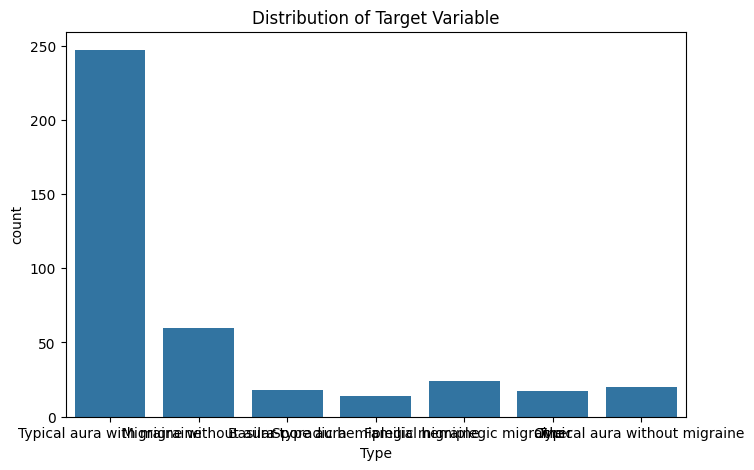

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Type")  # use correct column name
plt.title("Distribution of Target Variable")
plt.show()


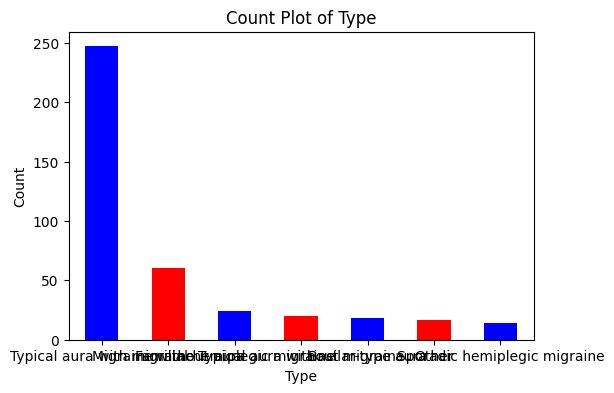

In [5]:
# Plot bar chart for Outcome distribution
plt.figure(figsize=(6, 4))
df['Type'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count Plot of Type')
plt.xticks(rotation=0)
plt.show()

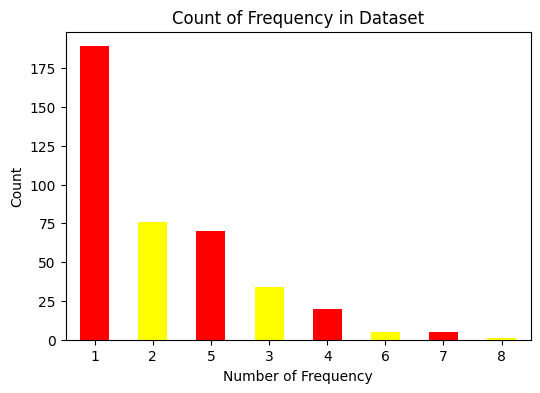

In [6]:
# Plot bar chart for Application mode distribution
plt.figure(figsize=(6,4))
df['Frequency'].value_counts().plot(kind='bar', color=['red', 'yellow'])  # Customize colors
plt.xlabel('Number of Frequency')
plt.ylabel('Count')
plt.title('Count of Frequency in Dataset')
plt.xticks(rotation=0)   
plt.show()

In [7]:
# Detect outliers using IQR method
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Identify outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers in Numerical Features:")
print(outliers)


Number of Outliers in Numerical Features:
Age             4
Duration        0
Frequency       0
Location       29
Character      31
Intensity      20
Nausea          5
Vomit           0
Phonophobia     9
Photophobia     8
Visual          9
Sensory        89
Dysphasia      15
Dysarthria      1
Vertigo        50
Tinnitus       24
Hypoacusis      6
Diplopia        2
Defect          6
Ataxia          0
Conscience      7
Paresthesia     3
DPF             0
dtype: int64


In [8]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check column names
print("\nColumn Names:")
print(df.columns)

# Summary of dataset
print("\nDataset Summary:")
print(df.info())


Summary Statistics:
              Age    Duration   Frequency    Location   Character  Intensity  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    31.705000    1.610000    2.365000    0.972500    0.977500    2.47000   
std     12.139043    0.770964    1.675947    0.268186    0.277825    0.76849   
min     15.000000    1.000000    1.000000    0.000000    0.000000    0.00000   
25%     22.000000    1.000000    1.000000    1.000000    1.000000    2.00000   
50%     28.000000    1.000000    2.000000    1.000000    1.000000    3.00000   
75%     40.000000    2.000000    4.000000    1.000000    1.000000    3.00000   
max     77.000000    3.000000    8.000000    2.000000    2.000000    3.00000   

           Nausea       Vomit  Phonophobia  Photophobia  ...  Dysarthria  \
count  400.000000  400.000000   400.000000   400.000000  ...    400.0000   
mean     0.987500    0.322500     0.977500     0.980000  ...      0.0025   
std      0.111242    0.468019 

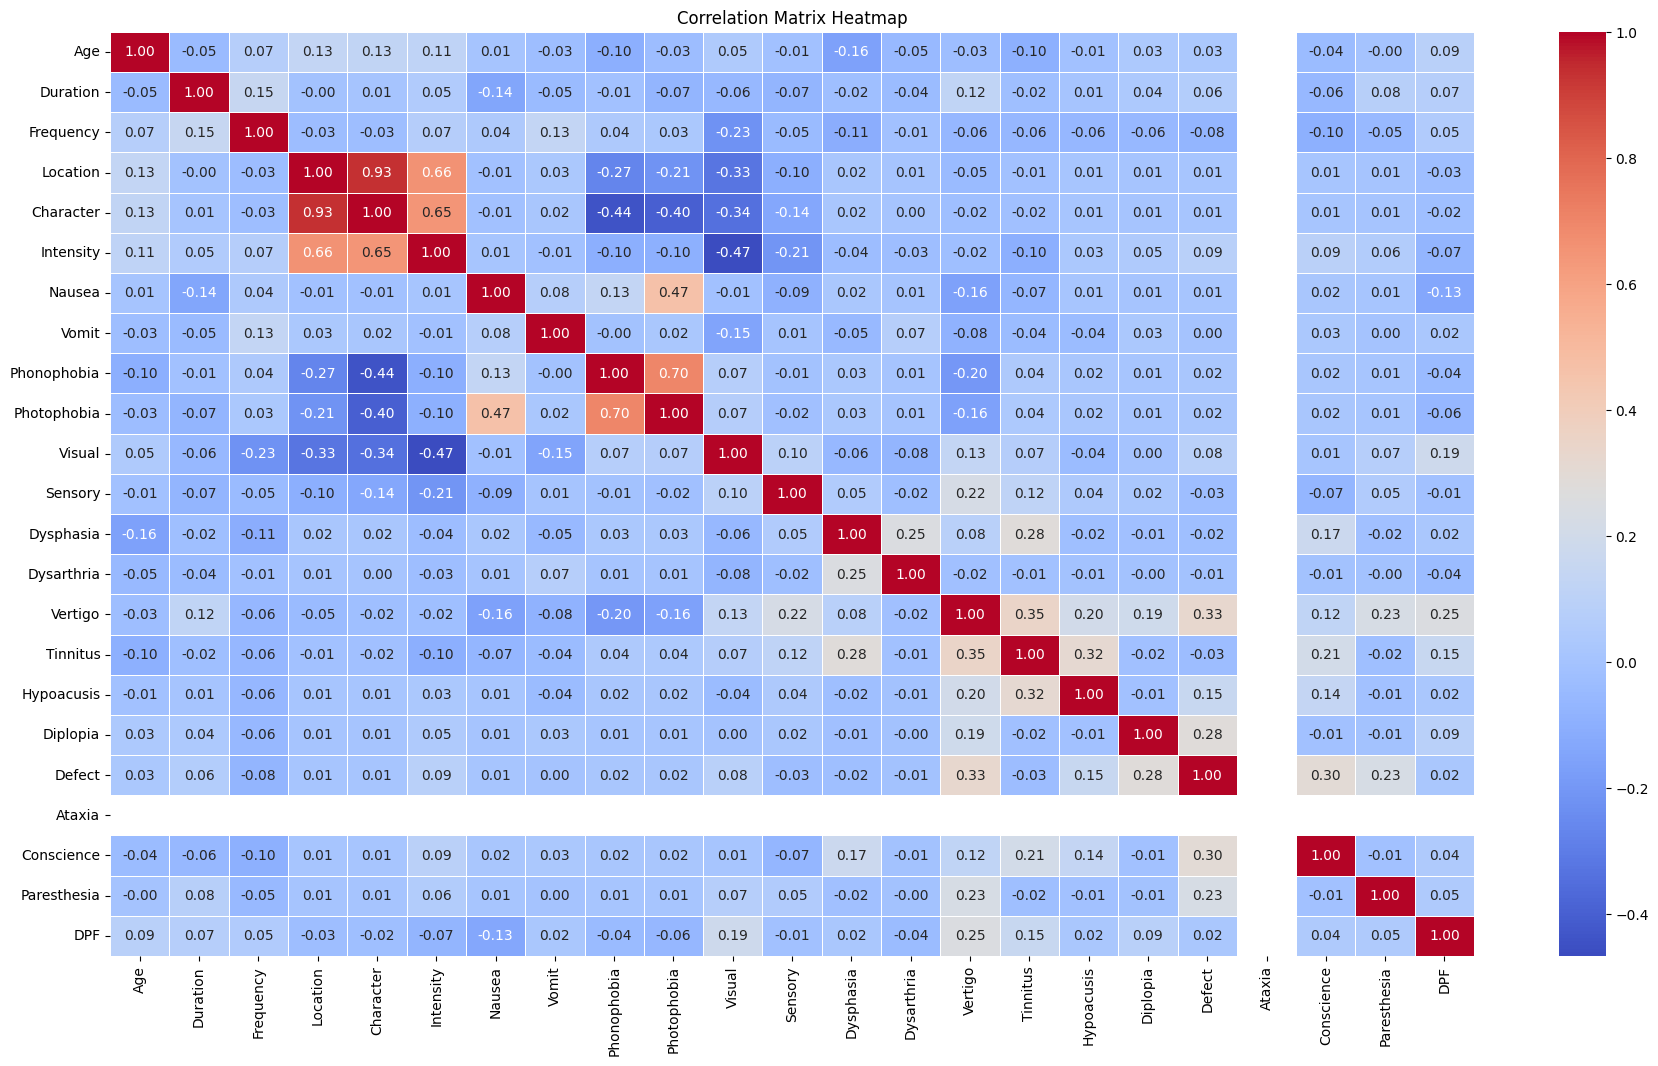

In [9]:
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and plot the correlation matrix
plt.figure(figsize=(22, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

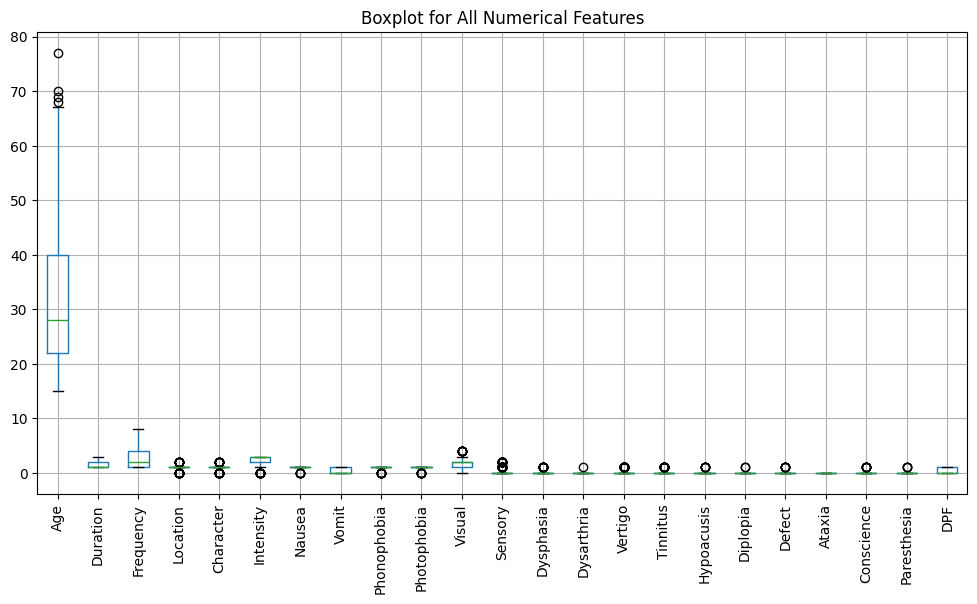

In [10]:

# Boxplot for all numerical features
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for All Numerical Features")
plt.show()

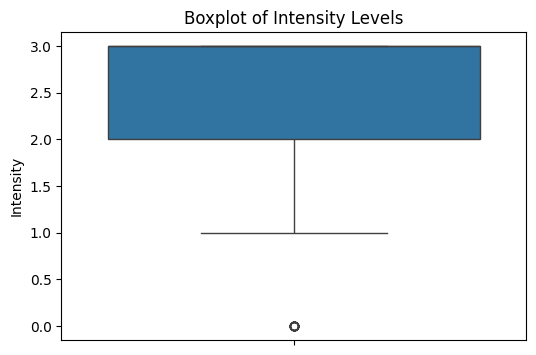

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Intensity"])
plt.title("Boxplot of Intensity Levels")
plt.show()


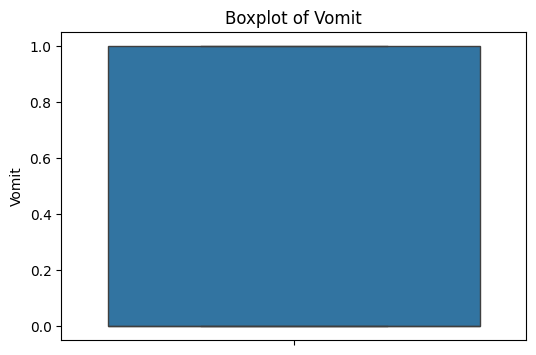

In [12]:

plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Vomit"])
plt.title("Boxplot of Vomit")
plt.show()

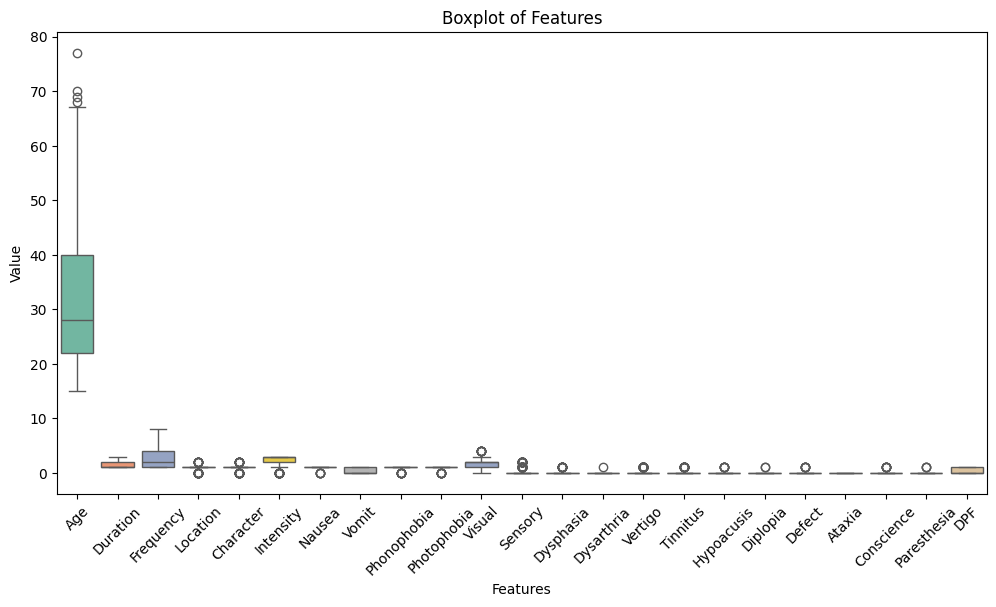

In [13]:
# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
# Customizing the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, palette="Set2")
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


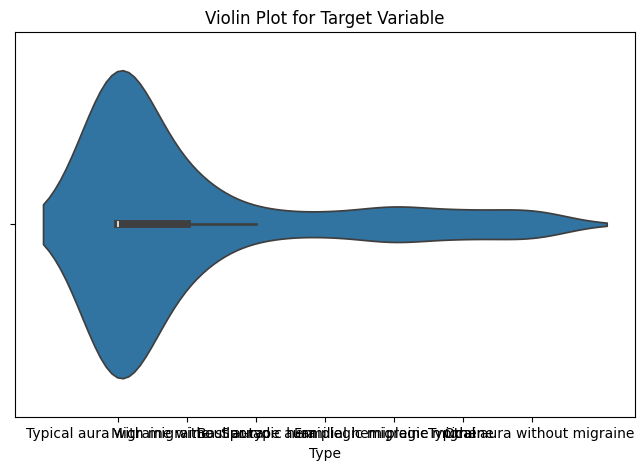

In [14]:
# Violin plot for target variable
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x="Type")
plt.title("Violin Plot for Target Variable")
plt.show()

In [15]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
# Separate features and target variable
X = df.drop(columns=["Type"])
y = df["Type"]

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Normalize numerical features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [19]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


models = {
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

best_model = None
best_score = 0
model_results = {}
best_model_instance = None

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

    if accuracy > best_score:
        best_score = accuracy
        best_model = name
        best_model_instance = model

# Print results
for model, score in model_results.items():
    print(f"{model}: {score:.4f}")

print(f"\nBest Model: {best_model} with accuracy: {best_score:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] Start training from score -3.283414
[LightGBM] [Info] Start training from score -2.723799
[LightGBM] [Info] Start training from score -1.918173
[LightGBM] [Info] Start training from score -3.203372
[LightGBM] [Info] Start training from score -3.283414
[LightGBM] [Info] Start training from score -0.480054
[LightGBM] [Info] Start training from score -2.935108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [20]:
model_data = {
    'model': best_model_instance,
    'scaler': scaler
}

joblib.dump(model_data, './model/migrane_best_model.pkl')
print("Best model saved as 'migrane_best_model.pkl'")

Best model saved as 'migrane_best_model.pkl'


In [21]:
import joblib

model_data = joblib.load("./model/migrane_best_model.pkl")

best_model = model_data['model']
scaler = model_data['scaler']

new_sample = np.array([[19,2,3,1,1,3,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0]])
new_sample_scaled = scaler.transform(new_sample)

# Predict using the best model
prediction = best_model.predict(new_sample_scaled)
print("Prediction for input sample:","Migraine without aura" if prediction[0] == 0 else "Typical aura without migraine" if prediction[0] == 1  else "Migraine without aura" if prediction[0] == 2 else "Familial hemiplegic migraine" if prediction[0] == 3 else "Sporadic hemiplegic migraine" if prediction[0] == 4 else "Typical aura with migraine" if prediction[0] == 5 else "Basilar-type aura" if prediction[0] == 6 else "Unknown")


Prediction for input sample: Sporadic hemiplegic migraine


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
